In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/riceClassification.csv")
df.shape

(18185, 12)

In [ ]:
df = df.drop(["id"], axis=1)
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [ ]:
df = df.dropna()
df.shape

(18185, 11)

In [ ]:
df["Class"].unique()

array([1, 0])

In [ ]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [ ]:

original_df = df.copy() # Creating a copy of the original Dataframe to use to normalize inference

for column in df.columns:
    df[column] = df[column]/df[column].abs().max() # Divide by the maximum of the column which will make max value of each column is 1

df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,0.444368,0.503404,0.775435,0.744658,0.424873,0.666610,0.741661,0.537029,0.844997,0.368316,1.0
1,0.281293,0.407681,0.622653,0.750489,0.273892,0.530370,0.804230,0.409661,0.919215,0.371471,1.0
2,0.298531,0.416421,0.630442,0.756341,0.284520,0.546380,0.856278,0.412994,0.959862,0.374747,1.0
3,0.300979,0.420463,0.629049,0.764024,0.286791,0.548616,0.883772,0.414262,0.961818,0.379222,1.0
4,0.361704,0.464626,0.682901,0.775033,0.345385,0.601418,0.867808,0.452954,0.966836,0.386007,1.0


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
X = np.array(df.iloc[: , :-1])
Y  = np.array(df.iloc[: , -1])

X_train , X_test , y_train , y_test = train_test_split(X , Y , test_size=0.3 , random_state=42)
X_test , X_val , y_test , y_val = train_test_split(X_test , y_test , test_size=0.5 , random_state=42)


print("Training set is: ", X_train.shape[0], " rows which is ", round(X_train.shape[0]/df.shape[0],4)*100, "%") # Print training shape
print("Validation set is: ",X_val.shape[0], " rows which is ", round(X_val.shape[0]/df.shape[0],4)*100, "%") # Print validation shape
print("Testing set is: ",X_test.shape[0], " rows which is ", round(X_test.shape[0]/df.shape[0],4)*100, "%") # Print testing shape


Training set is:  12729  rows which is  70.0 %
Validation set is:  2728  rows which is  15.0 %
Testing set is:  2728  rows which is  15.0 %


In [ ]:
import torch

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [ ]:
from torch.utils.data import Dataset, DataLoader

class dataset(Dataset):

  def __init__(self , X , Y) -> None:
     self.X = torch.tensor(X , dtype=torch.float32).to(device)
     self.Y = torch.tensor(Y , dtype=torch.float32).to(device)

  def __getitem__(self , idx):
    return self.X[idx] , self.Y[idx]

  def __len__(self):
    return len(self.X)

In [ ]:
BATCH_SIZE = 32
EPOCHS = 10
HIDDEN_NEURONS = 10
LR = 1e-3

In [ ]:
training_dataset = dataset(X_train, y_train)
validation_dataset = dataset(X_val, y_val)
testing_dataset = dataset(X_test, y_test)

In [ ]:
train_dataloader = DataLoader(training_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_dataloader = DataLoader(validation_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(testing_dataset, batch_size=BATCH_SIZE, shuffle=True)

In [ ]:
import torch.nn as nn

class MyModel(nn.Module):

    def __init__(self):
        super(MyModel, self).__init__()

        self.input_layer = nn.Linear(X.shape[1], HIDDEN_NEURONS)
        self.linear = nn.Linear(HIDDEN_NEURONS, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.input_layer(x)
        x = self.linear(x)
        x = self.sigmoid(x)
        return x


In [ ]:
from torchsummary import summary


model = MyModel().to(device)
summary(model , (X.shape[1],))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 10]             110
            Linear-2                    [-1, 1]              11
           Sigmoid-3                    [-1, 1]               0
Total params: 121
Trainable params: 121
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [ ]:
from torch.optim import Adam # Adam Optimizer

criterion = nn.BCELoss()
optimizer = Adam(model.parameters(), lr= LR)

In [ ]:
total_loss_train_plot = []
total_loss_validation_plot = []
total_acc_train_plot = []
total_acc_validation_plot = []

for epoch in range(EPOCHS):
  total_acc_train = 0
  total_loss_train = 0
  total_acc_val = 0
  total_loss_val = 0


  for data in train_dataloader:
    inputs, labels = data

    prediction = model(inputs).squeeze(1)

    batch_loss = criterion(prediction, labels)

    total_loss_train += batch_loss.item()

    acc = ((prediction).round() == labels).sum().item()

    total_acc_train += acc
    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()



## Validation
    with torch.no_grad():
        for data in val_dataloader:
            inputs, labels = data

            prediction = model(inputs).squeeze(1)

            batch_loss = criterion(prediction, labels)

            total_loss_val += batch_loss.item()

            acc = ((prediction).round() == labels).sum().item()

            total_acc_val += acc

    total_loss_train_plot.append(round(total_loss_train/1000, 4))
    total_loss_validation_plot.append(round(total_loss_val/1000, 4))
    total_acc_train_plot.append(round(total_acc_train/(training_dataset.__len__())*100, 4))
    total_acc_validation_plot.append(round(total_acc_val/(validation_dataset.__len__())*100, 4))

    print(f'''Epoch no. {epoch + 1} Train Loss: {total_loss_train/1000:.4f} Train Accuracy: {(total_acc_train/(training_dataset.__len__())*100):.4f} Validation Loss: {total_loss_val/1000:.4f} Validation Accuracy: {(total_acc_val/(validation_dataset.__len__())*100):.4f}''')
    print("="*50)


Streaming output truncated to the last 5000 lines.
Epoch no. 4 Train Loss: 0.0256 Train Accuracy: 71.0111 Validation Loss: 2.1191 Validation Accuracy: 28298.9736
Epoch no. 4 Train Loss: 0.0257 Train Accuracy: 71.2625 Validation Loss: 2.1256 Validation Accuracy: 28397.5440
Epoch no. 4 Train Loss: 0.0257 Train Accuracy: 71.5139 Validation Loss: 2.1322 Validation Accuracy: 28496.0777
Epoch no. 4 Train Loss: 0.0258 Train Accuracy: 71.7574 Validation Loss: 2.1387 Validation Accuracy: 28594.6114
Epoch no. 4 Train Loss: 0.0259 Train Accuracy: 71.9931 Validation Loss: 2.1453 Validation Accuracy: 28693.1452
Epoch no. 4 Train Loss: 0.0260 Train Accuracy: 72.2445 Validation Loss: 2.1518 Validation Accuracy: 28791.6789
Epoch no. 4 Train Loss: 0.0262 Train Accuracy: 72.4802 Validation Loss: 2.1583 Validation Accuracy: 28890.1760
Epoch no. 4 Train Loss: 0.0263 Train Accuracy: 72.7237 Validation Loss: 2.1650 Validation Accuracy: 28988.7463
Epoch no. 4 Train Loss: 0.0264 Train Accuracy: 72.9751 Valida

In [ ]:

with torch.no_grad():
  total_loss_test = 0
  total_acc_test = 0
  for data in test_dataloader:
    inputs, labels = data

    prediction = model(inputs).squeeze(1)

    batch_loss_test = criterion((prediction), labels)
    total_loss_test += batch_loss_test.item()
    acc = ((prediction).round() == labels).sum().item()
    total_acc_test += acc

print(f"Accuracy Score is: {round((total_acc_test/X_test.shape[0])*100, 2)}%")

Accuracy Score is: 98.9%


In [ ]:
import matplotlib.pyplot as plt

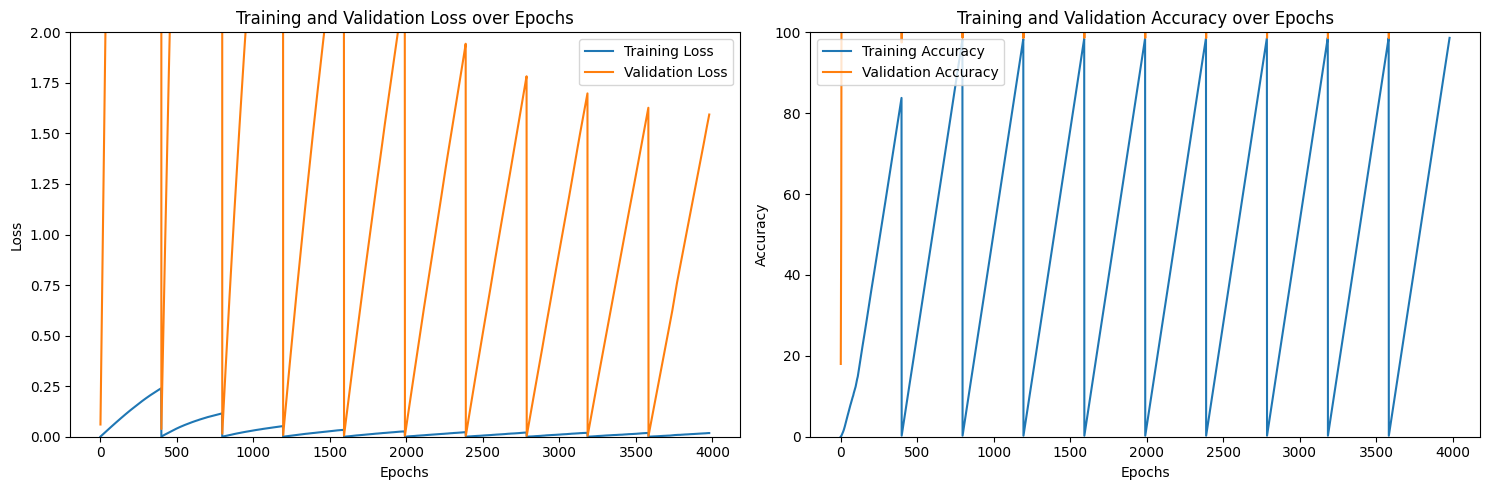

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axs[0].plot(total_loss_train_plot, label='Training Loss')
axs[0].plot(total_loss_validation_plot, label='Validation Loss')
axs[0].set_title('Training and Validation Loss over Epochs')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].set_ylim([0, 2])
axs[0].legend()

axs[1].plot(total_acc_train_plot, label='Training Accuracy')
axs[1].plot(total_acc_validation_plot, label='Validation Accuracy')
axs[1].set_title('Training and Validation Accuracy over Epochs')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].set_ylim([0, 100])
axs[1].legend()

plt.tight_layout()

plt.show()
